In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from unidecode import unidecode
import spacy
import spacy_spanish_lemmatizer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.cluster import KMeans
stopwords_sp = stopwords.words('spanish')
nlp = spacy.load("es_core_news_sm")

In [2]:
Base = pd.read_excel('SUPERVISADO.xlsx',header=0)
Base.tail(1)



,OPE,nivel,req_estudio_req_experiencia,proposito,funciones
4142,112909,Asistencial,Estudio: Diploma de Bachiller y curso de técn...,Realizar labores de apoyo a los procesos del á...,1. Apoyar la gestión documental del Fondo Depa...


In [3]:
# longitud de terminos en el corpus de cada criterio
temp= []

for i in Base['req_estudio_req_experiencia']:
    temp.append(len (i.split()))

Base['reqcount']=temp

temp1= []

for i in Base['proposito']:
    temp1.append(len (i.split()))

Base['prop_clcount']=temp1

temp2= []

for i in Base['funciones']:
    temp2.append(len (i.split()))

Base['fx_clcount']=temp2
Base

,OPE,nivel,req_estudio_req_experiencia,proposito,funciones,reqcount,prop_clcount,fx_clcount
0,785,Asesor,Estudio: Título profesional en disciplina acad...,"Dirigir la formulación y ejecución de planes, ...","1. Asesorar al alcalde, a las dependencias del...",41,49,230
1,788,Asesor,Estudio: Título de formación profesional en nú...,"Asesorar a la Secretaría de Agricultura, Ganad...",1. Asesorar en la elaboración de los estudios ...,57,42,180
2,789,Asesor,Estudio: Título profesional en núcleo básico d...,Asesorar al Secretario de Hacienda en temas re...,"1. Asesorar a la Secretaría de Hacienda, en te...",54,31,216
3,790,Asesor,Estudio: Título de formación profesional en di...,"Asesorar los planes, programas y proyectos de ...",1. Asesorar a la Secretaría de Salud en el ámb...,61,29,201
4,791,Asesor,Estudio: Título de Formación Profesional en n...,Asesorar los procesos Administrativos y Finan...,1. Asesorar al Despacho del Secretario de Salu...,55,25,280
...,...,...,...,...,...,...,...,...
4138,110944,Profesional,Estudio: Título profesional en disciplina acad...,Agilizar y garantizar eficiencia en los proces...,1. Realizar el proceso completo de contratació...,42,17,260
4139,111001,Asistencial,Estudio: Titulo de bachiller en cualquier moda...,Realizar actividades de apoyo a procesos admin...,4. Atender y orientar al público personal y te...,13,25,110
4140,111006,Asistencial,Estudio: Titulo de bachiller en cualquier moda...,Realizar actividades de apoyo a los procesos a...,1. Elaborar bases de datos que se requieran po...,13,26,112
4141,112643,Tecnico,Estudio: Terminación y aprobación de tres (3) ...,Velar por el orden del flujo vehicular en las ...,1. Ejercer control y vigilancia en el cumplimi...,17,34,300


In [4]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto= unidecode(texto)
    texto = texto.split() # tokenización 
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = nlp(str(texto)) # lematización
    text=[]
    for token in texto:        
        text.append(token.lemma_)
    texto = " ".join(text)
    return texto 

In [5]:
%%time
#Limpieza y stopwords requisitos de estudio y experiencia
Base['req_cl']= Base['req_estudio_req_experiencia'].apply(lambda val: pre_procesado(val))
#Limpieza y stopwords proposito
Base['prop_cl']= Base['proposito'].apply(lambda val: pre_procesado(val))
#Limpieza y stopwords funciones 
Base['fx_cl']= Base['funciones'].apply(lambda val: pre_procesado(val))

Wall time: 7min 16s


In [6]:
# revisar salidas de req_cl, prop_cl y fx_cl

In [7]:
Base['Contenido_cl']= Base['req_cl']+ Base['prop_cl']+ Base['fx_cl']
Base

,OPE,nivel,req_estudio_req_experiencia,proposito,funciones,reqcount,prop_clcount,fx_clcount,req_cl,prop_cl,fx_cl,Contenido_cl
0,785,Asesor,Estudio: Título profesional en disciplina acad...,"Dirigir la formulación y ejecución de planes, ...","1. Asesorar al alcalde, a las dependencias del...",41,49,230,"[ ' estudio ' , ' titulo ' , ' profesional ' ,...","[ ' dirigir ' , ' formulacion ' , ' ejecucion ...","[ ' asesorar ' , ' alcalde ' , ' dependencia '...","[ ' estudio ' , ' titulo ' , ' profesional ' ,..."
1,788,Asesor,Estudio: Título de formación profesional en nú...,"Asesorar a la Secretaría de Agricultura, Ganad...",1. Asesorar en la elaboración de los estudios ...,57,42,180,"[ ' estudio ' , ' titulo ' , ' formacion ' , '...","[ ' asesorar ' , ' secretaria ' , ' agricultur...","[ ' asesorar ' , ' elaboracion ' , ' estudio '...","[ ' estudio ' , ' titulo ' , ' formacion ' , '..."
2,789,Asesor,Estudio: Título profesional en núcleo básico d...,Asesorar al Secretario de Hacienda en temas re...,"1. Asesorar a la Secretaría de Hacienda, en te...",54,31,216,"[ ' estudio ' , ' titulo ' , ' profesional ' ,...","[ ' asesorar ' , ' secretario ' , ' hacienda '...","[ ' asesorar ' , ' secretaria ' , ' hacienda '...","[ ' estudio ' , ' titulo ' , ' profesional ' ,..."
3,790,Asesor,Estudio: Título de formación profesional en di...,"Asesorar los planes, programas y proyectos de ...",1. Asesorar a la Secretaría de Salud en el ámb...,61,29,201,"[ ' estudio ' , ' titulo ' , ' formacion ' , '...","[ ' asesorar ' , ' plan ' , ' programa ' , ' p...","[ ' asesorar ' , ' secretaria ' , ' salud ' , ...","[ ' estudio ' , ' titulo ' , ' formacion ' , '..."
4,791,Asesor,Estudio: Título de Formación Profesional en n...,Asesorar los procesos Administrativos y Finan...,1. Asesorar al Despacho del Secretario de Salu...,55,25,280,"[ ' estudio ' , ' titulo ' , ' formacion ' , '...","[ ' asesorar ' , ' proceso ' , ' administrativ...","[ ' asesorar ' , ' despacho ' , ' secretario '...","[ ' estudio ' , ' titulo ' , ' formacion ' , '..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4138,110944,Profesional,Estudio: Título profesional en disciplina acad...,Agilizar y garantizar eficiencia en los proces...,1. Realizar el proceso completo de contratació...,42,17,260,"[ ' estudio ' , ' titulo ' , ' profesional ' ,...","[ ' agilizar ' , ' garantizar ' , ' eficiencia...","[ ' realizar ' , ' proceso ' , ' completo ' , ...","[ ' estudio ' , ' titulo ' , ' profesional ' ,..."
4139,111001,Asistencial,Estudio: Titulo de bachiller en cualquier moda...,Realizar actividades de apoyo a procesos admin...,4. Atender y orientar al público personal y te...,13,25,110,"[ ' estudio ' , ' titulo ' , ' bachiller ' , '...","[ ' realizar ' , ' actividad ' , ' apoyo ' , '...","[ ' atender ' , ' orientar ' , ' publico ' , '...","[ ' estudio ' , ' titulo ' , ' bachiller ' , '..."
4140,111006,Asistencial,Estudio: Titulo de bachiller en cualquier moda...,Realizar actividades de apoyo a los procesos a...,1. Elaborar bases de datos que se requieran po...,13,26,112,"[ ' estudio ' , ' titulo ' , ' bachiller ' , '...","[ ' realizar ' , ' actividad ' , ' apoyo ' , '...","[ ' elaborar ' , ' base ' , ' dato ' , ' reque...","[ ' estudio ' , ' titulo ' , ' bachiller ' , '..."
4141,112643,Tecnico,Estudio: Terminación y aprobación de tres (3) ...,Velar por el orden del flujo vehicular en las ...,1. Ejercer control y vigilancia en el cumplimi...,17,34,300,"[ ' estudio ' , ' terminacion ' , ' aprobacion...","[ ' velar ' , ' orden ' , ' flujo ' , ' vehicu...","[ ' ejercer ' , ' control ' , ' vigilancia ' ,...","[ ' estudio ' , ' terminacion ' , ' aprobacion..."


In [8]:
Asesor=Base[Base['nivel']=='Asesor']
Profesional=Base[Base['nivel']=='Profesional']
Tecnico=Base[Base['nivel']=='Tecnico']
Asistencial=Base[Base['nivel']=='Asistencial']

In [9]:
%%time
#vectorización TF-IDF
tfidf_vectorizer = TfidfVectorizer()
#nivel asesor
Asesor_con_cl_tfidf = tfidf_vectorizer.fit_transform(Asesor['Contenido_cl'])
#nivel profesional
Profesional_con_cl_tfidf = tfidf_vectorizer.fit_transform(Profesional['Contenido_cl'])
#nivel técnico
Tecnico_con_cl_tfidf = tfidf_vectorizer.fit_transform(Tecnico['Contenido_cl'])
#nivel asistencial
Asistencial_con_cl_tfidf = tfidf_vectorizer.fit_transform(Asistencial['Contenido_cl'])

Wall time: 1.02 s


In [10]:
## Training and testing bases

from sklearn.model_selection import train_test_split

Asesor_test, Asesor_train = train_test_split(Asesor_con_cl_tfidf, random_state=0,
                                  train_size=0.3)

Profesional_test, Profesional_train = train_test_split(Profesional_con_cl_tfidf, random_state=0,
                                  train_size=0.5)

Tecnico_test, Tecnico_train = train_test_split(Tecnico_con_cl_tfidf, random_state=0,
                                  train_size=0.5)

Asistencial_test, Asistencial_train = train_test_split(Asistencial_con_cl_tfidf, random_state=0,
                                  train_size=0.5)

In [95]:
test = Profesional_test.toarray()
type(test)

numpy.ndarray

In [102]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(n_components=150, whiten=True, random_state=1234)

#vectorizer = TfidfVectorizer()
#features = vectorizer.fit_transform(Profesional['Contenido_cl'])

otro = pca.fit(test)
otro.components_

<bound method PCA.fit_transform of PCA(n_components=150, random_state=1234, whiten=True)>

ValueError: x and y must have same first dimension, but have shapes (29,) and (58,)

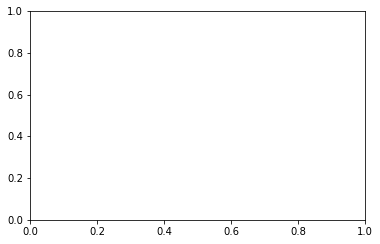

In [108]:
%%time
## Número óptimo de cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
#from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD

#pca = RandomizedPCA(n_components=150, whiten=True, random_state=1234)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
kmeans = KMeans(n_clusters = n_clusters, random_state = 1234, n_init=25)
model = make_pipeline(svd, kmeans)

# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
#features = vectorizer
range_n_clusters = range(5, 150, 5)
inertias = []

for n_clusters in range_n_clusters:
    
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(otro.components_)
    inertias.append(modelo_kmeans.inertia_)
    modelo_kmeans.fit(otro.components_)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


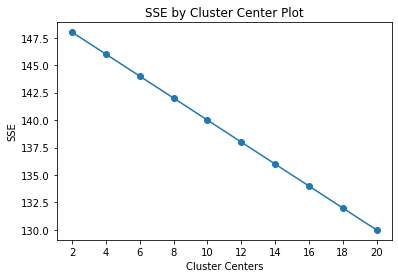

In [103]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters = k, n_init = 1024, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot');


find_optimal_clusters(otro.components_, 20)

In [84]:
fit

TruncatedSVD(n_components=5, n_iter=7, random_state=42)

Wall time: 42.9 s


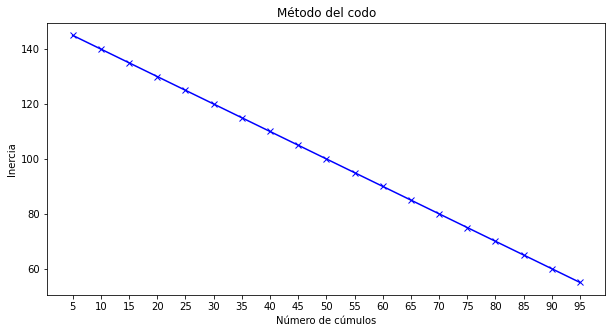

In [105]:
%%time
ks = []
kinertia = []
for k in range(5, 100, 5):
    kmeans = KMeans(n_clusters=k).fit(otro.components_)
    ks.append(k)
    kinertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title('Método del codo')
plt.xticks(ks)
plt.plot(ks,kinertia, 'bx-');

Wall time: 10min 7s


Text(0, 0.5, 'Media índices silhouette')

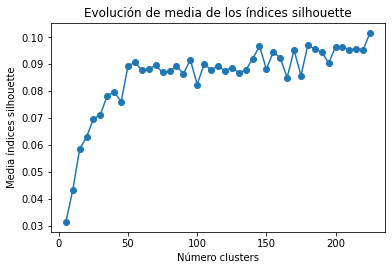

In [31]:
%%time
## Número óptimo de cluster

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(5, 230, 5)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(Profesional_test)
    silhouette_avg = silhouette_score(Profesional_test, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [36]:
# K-Means con el numero de clusters del modelo manual
Askmeans = KMeans(n_clusters=7, random_state = 1234, n_init=25).fit(Asesor_train)
Prokmeans = KMeans(n_clusters=84, random_state = 1234, n_init=25).fit(Profesional_train)
Teckmeans = KMeans(n_clusters=54, random_state = 1234, n_init=25).fit(Tecnico_train)
Akmeans = KMeans(n_clusters=37, random_state = 1234, n_init=25).fit(Asistencial_train)

In [44]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(Profesional['Contenido_cl'])

In [48]:
k = 84
print("Cluster centroids: \n")

order_centroids = Prokmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" %i)
    print("-"*10)
    print("\n")
    for j in order_centroids[i, :15]:
        print(" %s" % terms[j])
    print("-"*10)

Cluster centroids: 

Cluster 0:
----------


 unidad
 operativo
 gestion
 proceso
 ubique
 asignado
 proyecto
 mediante
 entidad
 procedimiento
 plan
 actualizacion
 sistema
 permitir
 cumplimiento
----------
Cluster 1:
----------


 espacio
 publico
 urbanistica
 urbano
 urbanistico
 policia
 paisaje
 sancionatorio
 control
 proyecto
 area
 programa
 silvicultura
 ocupacion
 afines
----------
Cluster 2:
----------


 dependencia
 especializado
 afines
 primero
 infancia
 objetivo
 programa
 acuerdo
 metas
 asesoria
 analizar
 vigente
 normatividad
 presentar
 diferente
----------
Cluster 3:
----------


 salud
 subsidiado
 regimen
 aseguramiento
 social
 sistema
 informacion
 poblacion
 eps
 departamento
 pobre
 seguridad
 beneficiario
 servicio
 eapb
----------
Cluster 4:
----------


 adolescente
 nino
 violencia
 intrafamiliar
 ninas
 derechos
 comisaria
 familia
 restablecimiento
 comisario
 familiar
 acerca
 psicologico
 usuario
 estudiante
----------
Cluster 5:
----------


 inf

In [42]:
type(Profesional_con_cl_tfidf)

scipy.sparse.csr.csr_matrix

Usar gap y silhoutte para determinar el número de cluster sugeridos.
Probar PCA para reducir la información
Corregir el tamaño de prueba y los casos para el test (training y test)
Investigar sobre _mini batch k-means_ 